In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#load csv into dataframe
df = pd.read_csv("/Users/alexanderfrankow/Desktop/Python/myenv/CSV/SupplyChain.csv")
df = df.drop(df.columns[0], axis=1)
df.set_index(df.columns[0], inplace=True)
df.head(20)


,QI,Machine,PreCheck,NumberPins,BoardID,Price,BoardCategory,MaterialOrigin
ID,,,,,,,,
1,0,3.0,0,22.0,A/5 21171,7.2500,NaN,S
2,1,1.0,1,38.0,PC 17599,71.2833,C85,C
3,1,3.0,1,26.0,STON/O2. 3101282,7.9250,NaN,S
4,1,1.0,1,35.0,113803,53.1000,C123,S
5,0,3.0,0,35.0,373450,8.0500,NaN,S
6,0,3.0,0,NaN,330877,8.4583,NaN,Q
7,0,1.0,0,54.0,17463,51.8625,E46,S
8,0,3.0,0,2.0,349909,21.0750,NaN,S
9,1,3.0,1,27.0,347742,11.1333,NaN,S


In [111]:
print(df.info())
print(f"The Dataframe has {df.shape[0]} observations with {df.shape[1]} columns" )
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   QI              891 non-null    int64  
 1   Machine         802 non-null    float64
 2   PreCheck        891 non-null    int64  
 3   NumberPins      714 non-null    float64
 4   BoardID         891 non-null    object 
 5   Price           880 non-null    float64
 6   BoardCategory   204 non-null    object 
 7   MaterialOrigin  889 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 62.6+ KB
None
The Dataframe has 891 observations with 8 columns
               QI     Machine    PreCheck  NumberPins       Price
count  891.000000  802.000000  891.000000  714.000000  880.000000
mean     0.383838    2.301746    0.352413   29.699118   32.332125
std      0.486592    0.836867    0.477990   14.526497   49.964536
min      0.000000    1.000000    0.000000    0.420000    0.000000
25%

In [112]:
cols_to_categorical = ['QI', 'Machine', 'PreCheck', 'BoardID', 'BoardCategory', 'MaterialOrigin']
df[cols_to_categorical] = df[cols_to_categorical].astype('category')
df['NumberPins'] = df['NumberPins'].round().astype('Int64')


In [113]:
nan_summary = df.isnull().sum().to_frame(name='Missing Value')
non_nan_summary = df.notnull().sum().to_frame(name='No Missing Value')
total_rows = len(df)
nan_percentage = (nan_summary / total_rows * 100).round(2)
nan_percentage.columns = ['Relative Missing Values']
contingency_table = pd.concat([nan_summary, non_nan_summary, nan_percentage], axis=1)

print(contingency_table)

                Missing Value  No Missing Value  Relative Missing Values
QI                          0               891                     0.00
Machine                    89               802                     9.99
PreCheck                    0               891                     0.00
NumberPins                177               714                    19.87
BoardID                     0               891                     0.00
Price                      11               880                     1.23
BoardCategory             687               204                    77.10
MaterialOrigin              2               889                     0.22


In [114]:
df = df.drop(df.columns[6], axis=1)
print(df.describe(include='all'))
print(df.info())

           QI  Machine  PreCheck  NumberPins BoardID       Price  \
count   891.0    802.0     891.0       714.0     891  880.000000   
unique    2.0      3.0       2.0        <NA>     681         NaN   
top       0.0      3.0       0.0        <NA>    1601         NaN   
freq    549.0    438.0     577.0        <NA>       7         NaN   
mean      NaN      NaN       NaN   29.693277     NaN   32.332125   
std       NaN      NaN       NaN   14.524527     NaN   49.964536   
min       NaN      NaN       NaN         0.0     NaN    0.000000   
25%       NaN      NaN       NaN        20.0     NaN    7.895800   
50%       NaN      NaN       NaN        28.0     NaN   14.454200   
75%       NaN      NaN       NaN        38.0     NaN   31.068750   
max       NaN      NaN       NaN        80.0     NaN  512.329200   

       MaterialOrigin  
count             889  
unique              3  
top                 S  
freq              644  
mean              NaN  
std               NaN  
min            

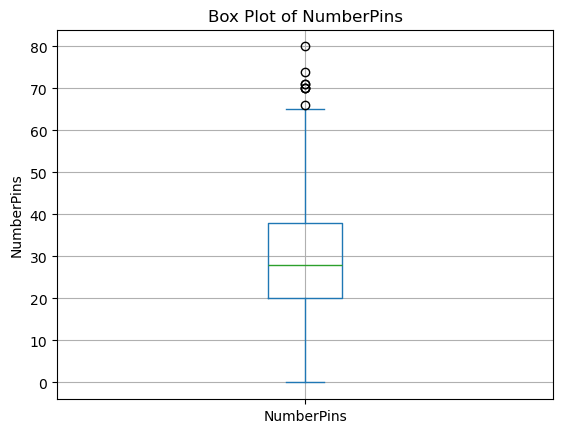

In [115]:
df['NumberPins'].plot.box(title="Box Plot of NumberPins")
plt.ylabel("NumberPins")
plt.grid(True)
plt.show()

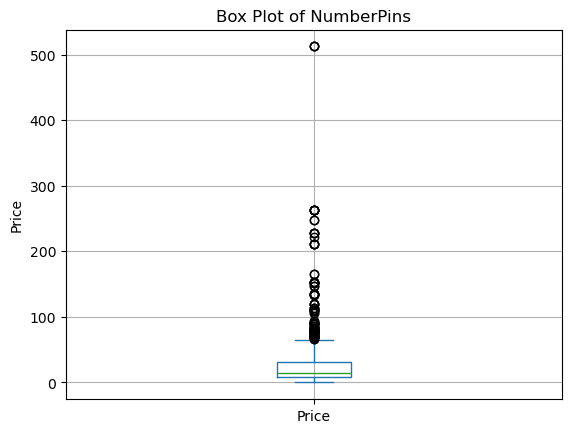

In [116]:
df['Price'].plot.box(title="Box Plot of NumberPins")
plt.ylabel("Price")
plt.grid(True)
plt.show()

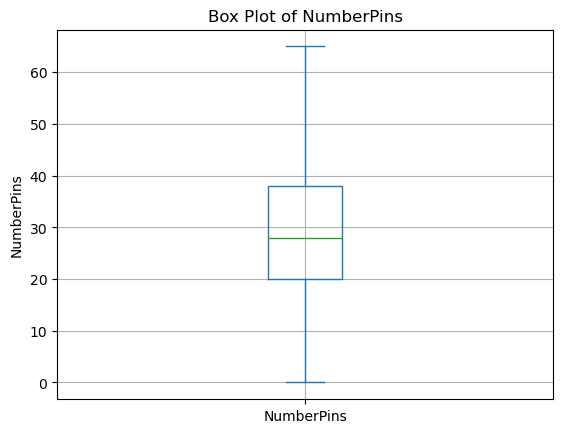

In [117]:
Q1 = df['NumberPins'].quantile(0.25)
Q3 = df['NumberPins'].quantile(0.75)
IQR = Q3 - Q1
upper_fence = Q3 + 1.5 * IQR
df.loc[df['NumberPins'] > upper_fence, 'NumberPins'] = np.nan
df['NumberPins'].plot.box(title="Box Plot of NumberPins")
plt.ylabel("NumberPins")
plt.grid(True)
plt.show()


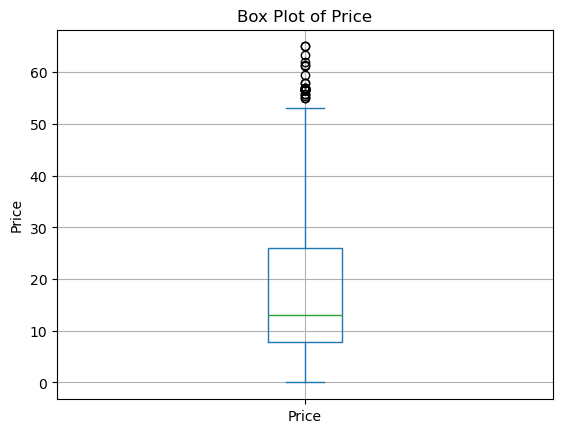

In [118]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
upper_fence = Q3 + 1.5 * IQR
df.loc[df['Price'] > upper_fence, 'Price'] = np.nan
df['Price'].plot.box(title="Box Plot of Price")
plt.ylabel("Price")
plt.grid(True)
plt.show()


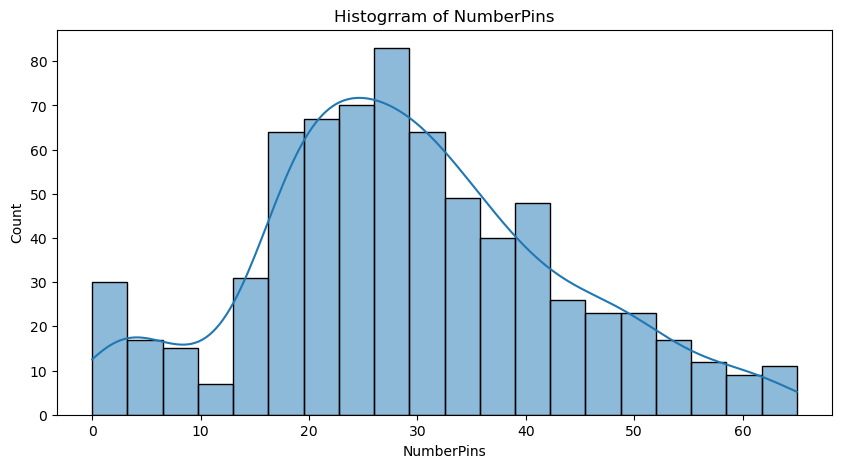

In [119]:
plt.figure(figsize=(10, 5))
sns.histplot(df['NumberPins'].dropna(), bins=20, kde=True)
plt.title("Histogrram of NumberPins")
plt.show()

In [120]:
nan_summary = df.isnull().sum().to_frame(name='Missing Value')
non_nan_summary = df.notnull().sum().to_frame(name='No Missing Value')
total_rows = len(df)
nan_percentage = (nan_summary / total_rows * 100).round(2)
nan_percentage.columns = ['Relative Missing Values']
contingency_table = pd.concat([nan_summary, non_nan_summary, nan_percentage], axis=1)
print(contingency_table)



                Missing Value  No Missing Value  Relative Missing Values
QI                          0               891                     0.00
Machine                    89               802                     9.99
PreCheck                    0               891                     0.00
NumberPins                185               706                    20.76
BoardID                     0               891                     0.00
Price                     127               764                    14.25
MaterialOrigin              2               889                     0.22


In [121]:
df['NumberPins'] = df['NumberPins'].fillna(round(df['NumberPins'].mean())).astype('Int64')
df['Machine'] = df['Machine'].fillna(df['Machine'].mode()[0])
df['Price'] = df['Price'].fillna(df['Price'].mean())

nan_summary = df.isnull().sum().to_frame(name='Missing Value')
non_nan_summary = df.notnull().sum().to_frame(name='No Missing Value')
total_rows = len(df)
nan_percentage = (nan_summary / total_rows * 100).round(2)
nan_percentage.columns = ['Relative Missing Values']
contingency_table = pd.concat([nan_summary, non_nan_summary, nan_percentage], axis=1)
print(contingency_table)

                Missing Value  No Missing Value  Relative Missing Values
QI                          0               891                     0.00
Machine                     0               891                     0.00
PreCheck                    0               891                     0.00
NumberPins                  0               891                     0.00
BoardID                     0               891                     0.00
Price                       0               891                     0.00
MaterialOrigin              2               889                     0.22


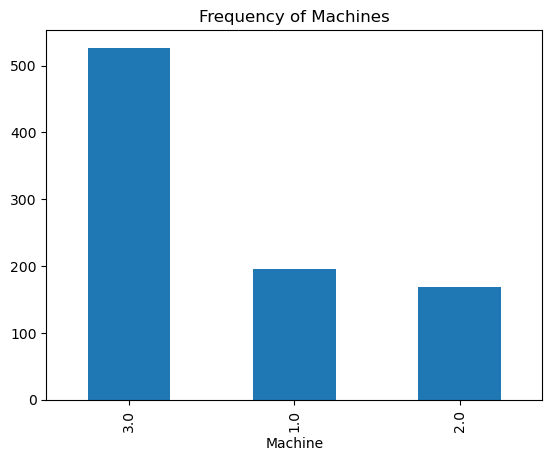

In [122]:
df['Machine'].value_counts().plot(kind='bar', title="Frequency of Machines")
plt.show()

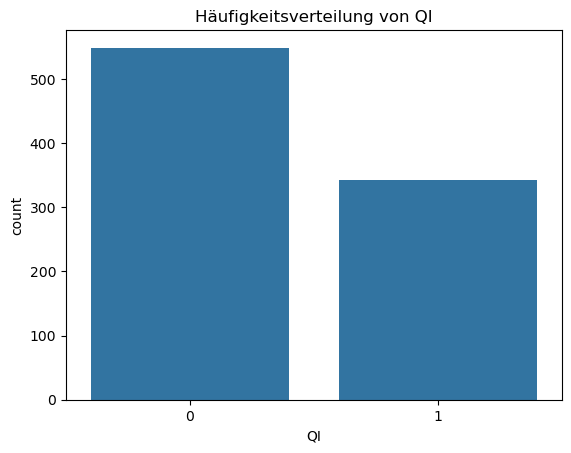

In [123]:
sns.countplot(x=df['QI'])
plt.title("Häufigkeitsverteilung von QI")
plt.show()

In [124]:
contingency_table = pd.crosstab(df['QI'], df['PreCheck'])
print(contingency_table)
print("In percentage:")
prop_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print(prop_table)
contingency_table = pd.crosstab(df['QI'], df['Machine'])
print(contingency_table)

PreCheck    0    1
QI                
0         468   81
1         109  233
In percentage:
PreCheck         0         1
QI                          
0         0.852459  0.147541
1         0.318713  0.681287
Machine  1.0  2.0  3.0
QI                    
0         74   87  388
1        122   81  139


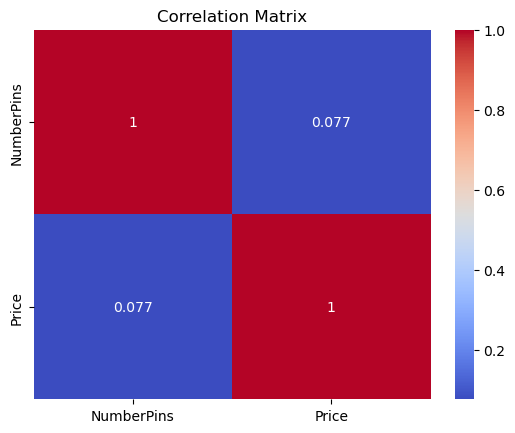

In [125]:
corr_matrix = df[['NumberPins','Price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 2. Clustering Analysis

## k-means Clustering

In [126]:
# Select numerical variables
kmeans_data = df[['NumberPins', 'Price']]
kmeans_data_scaled = StandardScaler().fit_transform(kmeans_data)

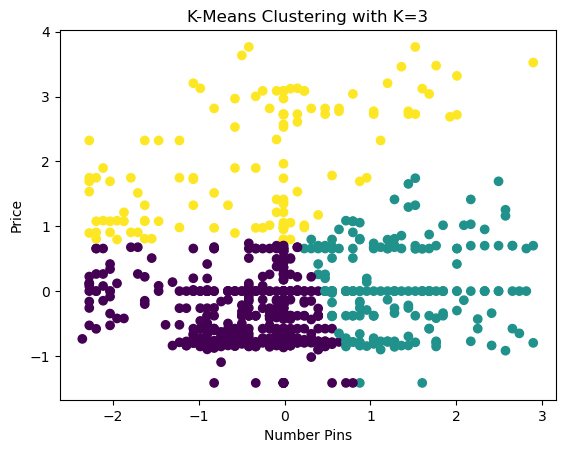

In [127]:
# K-means clustering with k=2
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=12345) # Increased n_init for stability
kmeans_results = kmeans.fit_predict(kmeans_data_scaled)

df['Cluster_means'] = kmeans_results

# Plot results
plt.scatter(kmeans_data_scaled[:, 0], kmeans_data_scaled[:, 1], c=kmeans_results, cmap='viridis')
plt.xlabel("Number Pins")
plt.ylabel("Price")
plt.title(f"K-Means Clustering with K={k}")
plt.show()

In [128]:
kmeans_n50 = KMeans(n_clusters=3, n_init=50, random_state=12345)
kmeans_results_n50 = kmeans_n50.fit_predict(kmeans_data_scaled)

df['Cluster_means'] = kmeans_results_n50
print(df.head(40))

   QI Machine PreCheck  NumberPins           BoardID      Price  \
ID                                                                
1   0     3.0        0          22         A/5 21171   7.250000   
2   1     1.0        1          38          PC 17599  17.762357   
3   1     3.0        1          26  STON/O2. 3101282   7.925000   
4   1     1.0        1          35            113803  53.100000   
5   0     3.0        0          35            373450   8.050000   
6   0     3.0        0          29            330877   8.458300   
7   0     1.0        0          54             17463  51.862500   
8   0     3.0        0           2            349909  21.075000   
9   1     3.0        1          27            347742  11.133300   
10  1     2.0        1          14            237736  30.070800   
11  1     3.0        1           4           PP 9549  16.700000   
12  1     1.0        1          58            113783  26.550000   
13  0     3.0        0          20         A/5. 2151   8.05000

In [129]:
# Overview
df.describe(include='all')

,QI,Machine,PreCheck,NumberPins,BoardID,Price,MaterialOrigin,Cluster_means
count,891.0,891.0,891.0,891.0,891,891.000000,889,891.000000
unique,2.0,3.0,2.0,<NA>,681,NaN,3,NaN
top,0.0,3.0,0.0,<NA>,1601,NaN,S,NaN
freq,549.0,527.0,577.0,<NA>,7,NaN,644,NaN
mean,NaN,NaN,NaN,29.173962,NaN,17.762357,NaN,0.898990
std,NaN,NaN,NaN,12.369137,NaN,12.553586,NaN,0.577586
min,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,22.0,NaN,7.925000,NaN,1.000000
50%,NaN,NaN,NaN,29.0,NaN,14.500000,NaN,1.000000
75%,NaN,NaN,NaN,35.0,NaN,23.725000,NaN,1.000000


# 2. Splitting Training and Test Data


In [130]:
train, test = train_test_split(df, test_size=0.25, random_state=12345)


In [133]:
# 3. Logistic Regression

# Fit logistic regression model
logit = LogisticRegression(max_iter=500)  # Default is 100, try 500 or higher
X_train = train[['Machine', 'PreCheck', 'NumberPins', 'Price', 'MaterialOrigin', 'Cluster_means']]
y_train = train['QI']
logit.fit(pd.get_dummies(X_train), y_train)

# Predictions
X_test = test[['Machine', 'PreCheck', 'NumberPins', 'Price', 'MaterialOrigin', 'Cluster_means']]
y_test = test['QI']
logit_predictions = logit.predict(pd.get_dummies(X_test))

# Confusion Matrix and Error Rate
conf_matrix_LR = confusion_matrix(y_test, logit_predictions)
error_rate_LR = 1 - accuracy_score(y_test, logit_predictions)

accuracy = accuracy_score(y_test, logit_predictions)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.7937219730941704
